In [1]:

import sys
import os

# Get the project root relative to the notebook location
# Assumes the notebook is inside 'notebooks/' one level below project root
project_root = os.path.abspath("..")  # go one folder up
if project_root not in sys.path:
    sys.path.append(project_root)

# Now you can import your modules

In [2]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from core import DataLoader, Profiler, Preprocessor, EDA, Visualizer

warnings.filterwarnings("ignore")
sns.set(style="whitegrid", rc={"figure.figsize": (10, 5)})

In [3]:
COUNTRY = "togo"  
RAW_PATH = f"../data/raw/{COUNTRY}.csv"
CLEAN_PATH = f"../data/processed/{COUNTRY}_clean.csv"

print(f"Running EDA for: {COUNTRY.upper()}")

Running EDA for: TOGO


In [4]:
loader = DataLoader(base_path="../data/raw")
df = loader.load_csv(f"{COUNTRY}.csv")

print(f"✅ Loaded {len(df)} rows and {len(df.columns)} columns.")
df.head()

✅ Loaded 525600 rows and 19 columns.


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [5]:
profiler = Profiler(df)

print("📊 Summary Statistics:")
display(profiler.summary())

print("\n📉 Missing Value Report:")
display(profiler.missing_report())

📊 Summary Statistics:


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-25 12:00:30.000000768,2021-10-25 00:01:00,2022-01-24 06:00:45,2022-04-25 12:00:30,2022-07-25 18:00:15,2022-10-25 00:00:00,NaN
GHI,525600.0,230.55504,-12.7,-2.2,2.1,442.4,1424.0,322.532347
DNI,525600.0,151.258469,0.0,0.0,0.0,246.4,1004.5,250.956962
DHI,525600.0,116.444352,0.0,0.0,2.5,215.7,805.7,156.520714
ModA,525600.0,226.144375,0.0,0.0,4.4,422.525,1380.0,317.346938
ModB,525600.0,219.568588,0.0,0.0,4.3,411.0,1367.0,307.93251
Tamb,525600.0,27.751788,14.9,24.2,27.2,31.1,41.4,4.758023
RH,525600.0,55.01316,3.3,26.5,59.3,80.8,99.8,28.778732
WS,525600.0,2.368093,0.0,1.4,2.2,3.2,16.1,1.462668
WSgust,525600.0,3.22949,0.0,1.9,2.9,4.4,23.1,1.882565



📉 Missing Value Report:


,missing_count,missing_pct
Comments,525600,100.0


In [9]:
z_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_cols = [c for c in z_cols if c in df.columns]

_, mask = profiler.detect_outliers(z_cols)
print(f"🚨 Detected {mask.sum()} outlier rows (|Z| > 3).")

🚨 Detected 9251 outlier rows (|Z| > 3).


In [10]:
cleaner = Preprocessor(df)

# Fill missing values with median
df_clean = cleaner.fill_missing(z_cols)

# Drop rows flagged as outliers
df_clean = cleaner.drop_outliers(mask)

print(f"✅ Cleaned dataset shape: {df_clean.shape}")

✅ Cleaned dataset shape: (516349, 19)


In [11]:
df_clean.to_csv(CLEAN_PATH, index=False)
print(f"💾 Cleaned data saved to: {CLEAN_PATH}")

💾 Cleaned data saved to: ../data/processed/togo_clean.csv


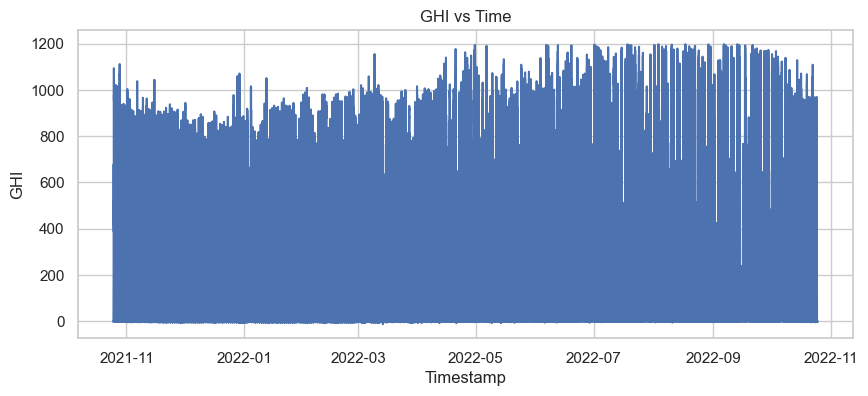

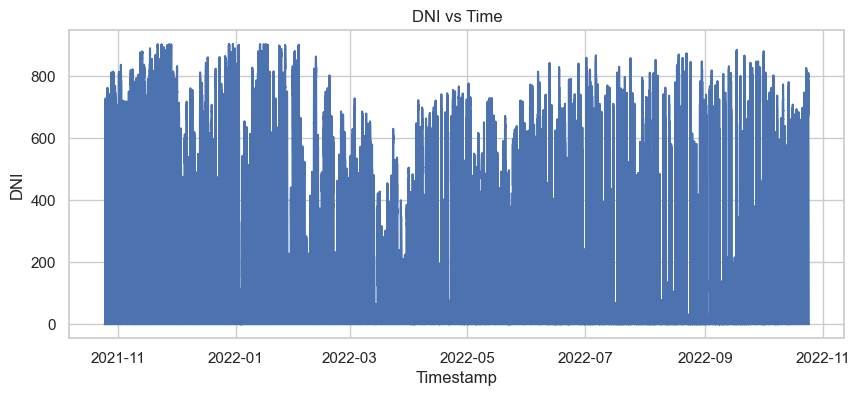

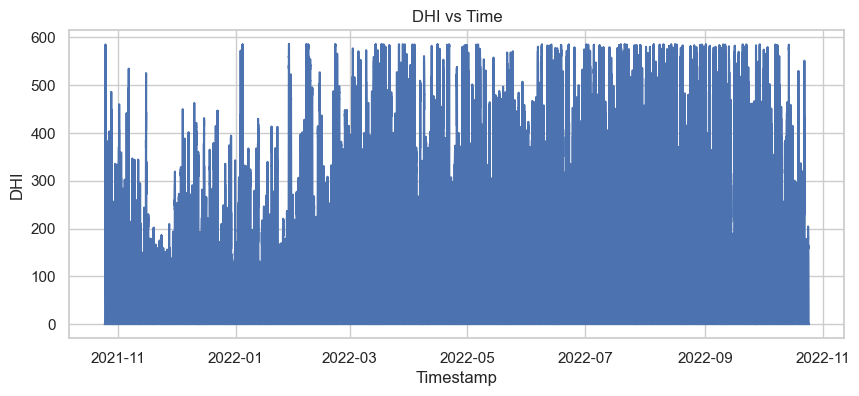

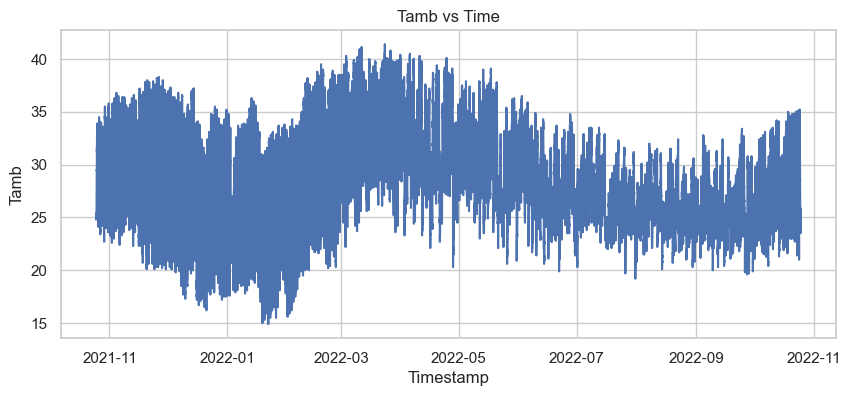

In [12]:
eda = EDA(df_clean)
eda.plot_time_series(["GHI", "DNI", "DHI", "Tamb"])

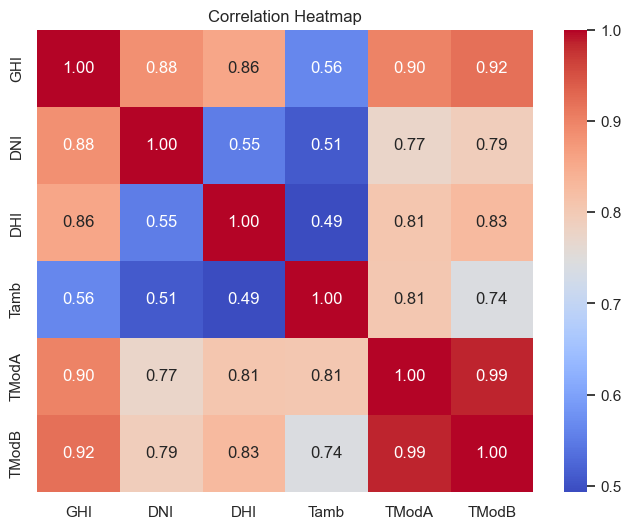

In [13]:
eda.correlation_heatmap(["GHI", "DNI", "DHI", "Tamb", "TModA", "TModB"])

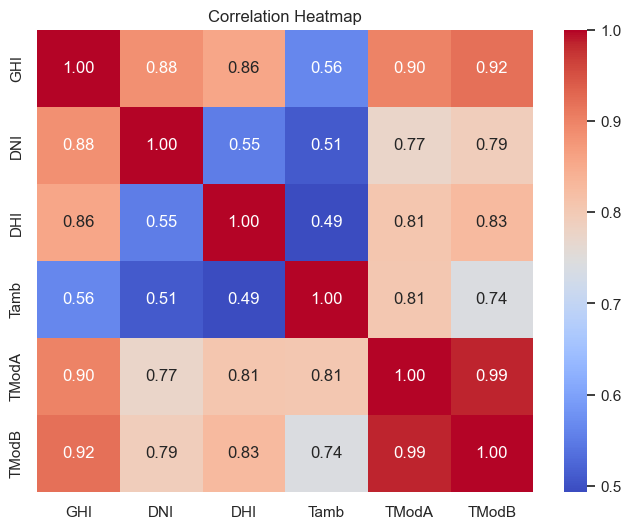

In [14]:
eda.correlation_heatmap(["GHI", "DNI", "DHI", "Tamb", "TModA", "TModB"])

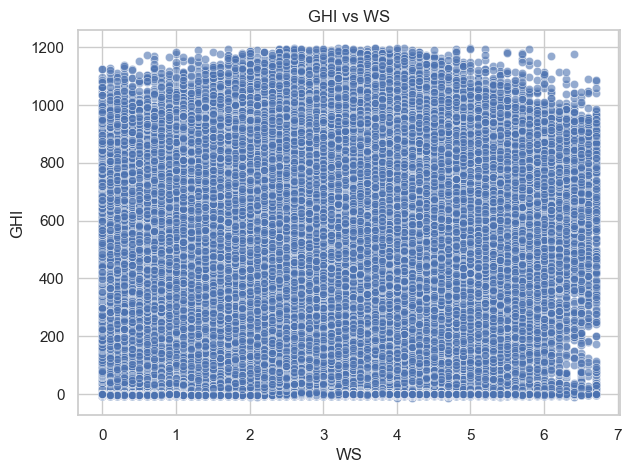

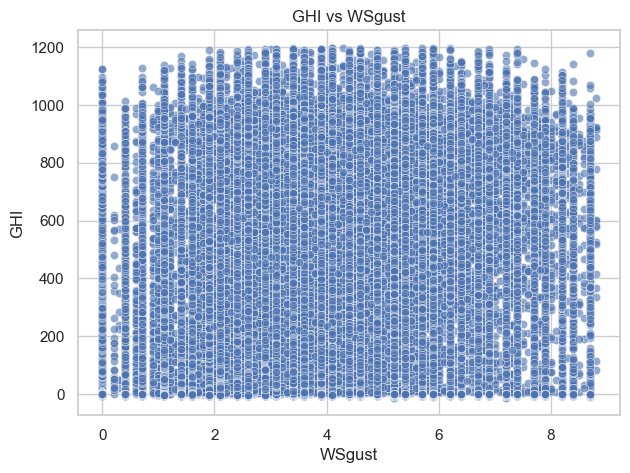

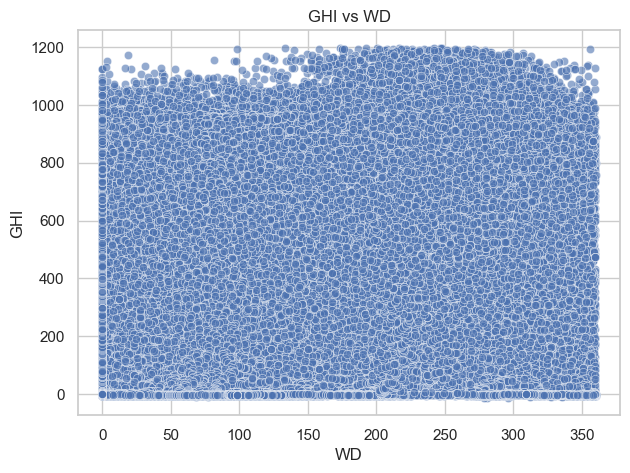

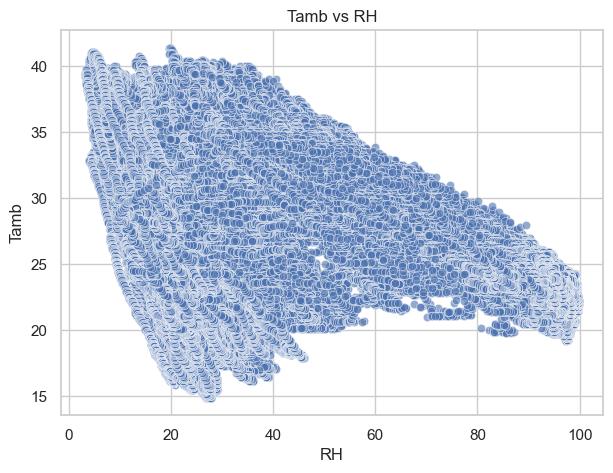

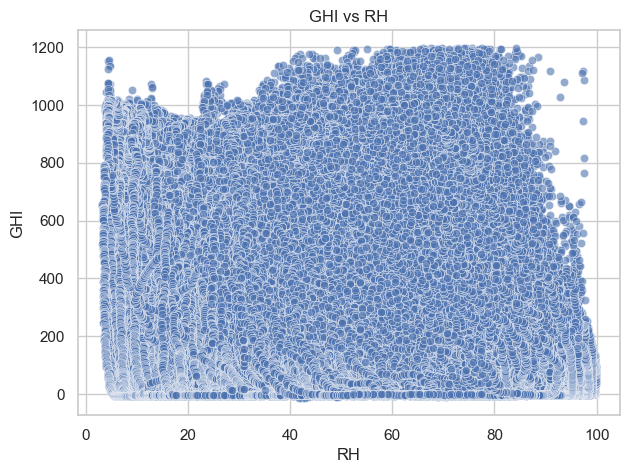

In [15]:
for col in ["WS", "WSgust", "WD"]:
    if col in df_clean.columns:
        eda.scatter(col, "GHI")

if "RH" in df_clean.columns:
    eda.scatter("RH", "Tamb")
    eda.scatter("RH", "GHI")

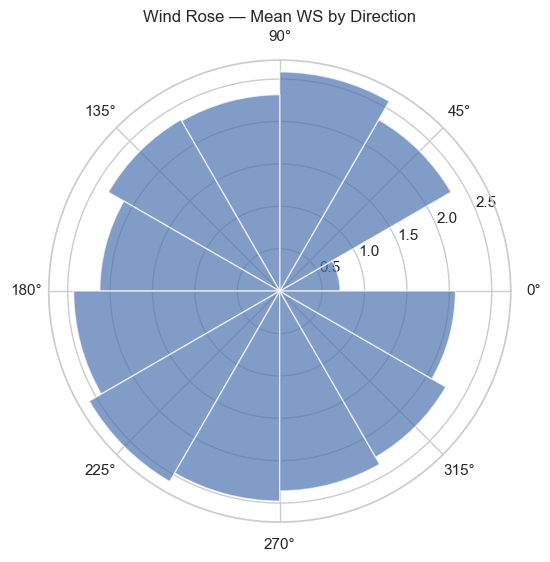

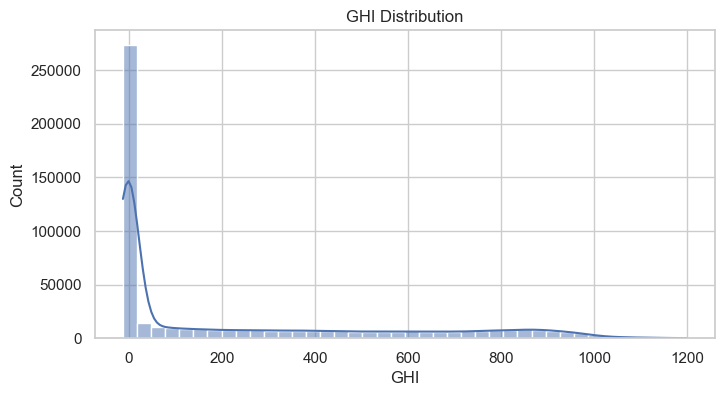

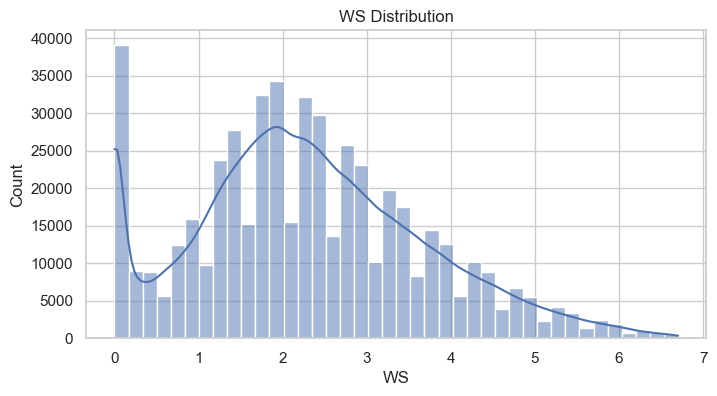

In [16]:
viz = Visualizer()

viz.wind_rose(df_clean)
viz.histograms(df_clean, ["GHI", "WS"])

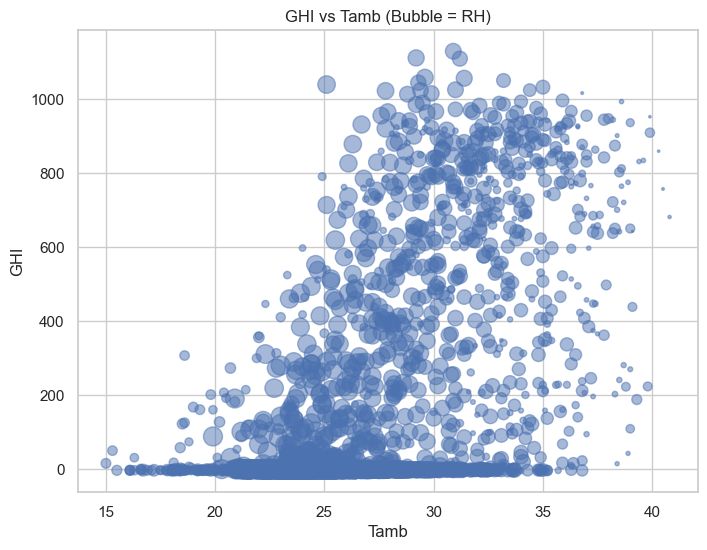

In [17]:
if all(col in df_clean.columns for col in ["Tamb", "GHI", "RH"]):
    viz.bubble_chart(df_clean, "Tamb", "GHI", "RH",
                     "GHI vs Tamb (Bubble = RH)")

In [18]:
# 🔍 Summary of Observations
# - Note any months, times of day, or locations with unusually high GHI/DNI/DHI.
# - Observe relationships between humidity, temperature, and solar radiation.
# - Summarize findings that could affect regional solar potential.
print(f"✅ EDA for {COUNTRY.capitalize()} completed successfully.")

✅ EDA for Togo completed successfully.
